In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
%matplotlib inline

In [2]:
#Cargamos dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])
df.tail()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# Se divide la matriz del dataset en dos partes

X = df.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas

y = df.iloc[:,4].values
# El vector y contiene los valores de la 4 columna (especie)para todas las filas

In [4]:
#NORMALIZACIÓN
#Aplicamos una transformación de los datos para poder aplicar 
#las propiedades de la distribución normal
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [5]:
#CÁLCULO DE AUTOVALORES Y AUTOVECTORES
#Calculamos la varianza patra ver la escencia principal del dataset

In [6]:
# Calculamos la matriz de covarianza
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
#Ahora interpretamos los patrones de información contenidos en los datos
#Calculamos los autovalores y autovectores de la matriz
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)


#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

Y = X_std.dot(matrix_w)

Autovalores en orden descendiente:
2.930353775589316
0.9274036215173427
0.14834222648163983
0.020746013995595787


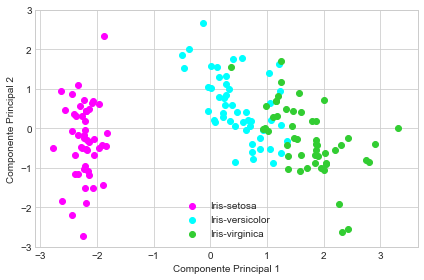

In [8]:
#representamos gráficamente el nuevo espacio de datos
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [9]:
'''Hemos conseguido reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos 
dimensiones que aún así conserva la información más esencial. de forma que nos resultará mucho más
sencillo el trabajo de crear un modelo de clasificación a partir de estos datos.'''

'Hemos conseguido reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos \ndimensiones que aún así conserva la información más esencial. de forma que nos resultará mucho más\nsencillo el trabajo de crear un modelo de clasificación a partir de estos datos.'

In [10]:
'''Kernel PCA (KPCA)
PCA aplica una transformación lineal, y esa también es su limitación. El Kernel PCA (KPCA) extiende
PCA a la no linealidad. Primero mapea los datos originales a un espacio de características no lineales 
(normalmente de mayor dimensión), y luego aplica PCA para extraer los componentes principales de ese espacio.'''

'Kernel PCA (KPCA)\nPCA aplica una transformación lineal, y esa también es su limitación. El Kernel PCA (KPCA) extiende\nPCA a la no linealidad. Primero mapea los datos originales a un espacio de características no lineales \n(normalmente de mayor dimensión), y luego aplica PCA para extraer los componentes principales de ese espacio.'

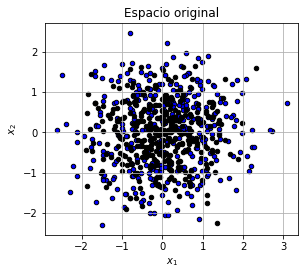

In [11]:
np.random.seed(0)
#Cambiamos el factor y agregamos mas ruido
X, y = make_circles(n_samples=700, factor=.4, noise=.7)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="blue",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="black",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

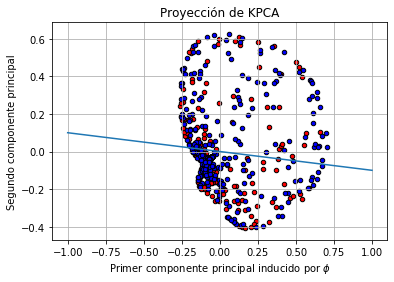

In [12]:
#resultado de que los puntos se trazan contra el primer y segundo componente principal.
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()